## Explanation of sentiment analysis.
Sentiment analysis is the process of classifying whether a block of text is positive, negative, or neutral
Sentiment analysis is a popular task in natural language processing. The goal of sentiment analysis is to classify the text based on the mood or mentality expressed in the text, which can be positive negative, or neutral.

#Exploratory Data Analysis (EDA) is an approach used in statistics to analyze and investigate data sets, summarizing their main characteristics.
During EDA, data scientists explore the data to understand patterns, identify relationships between variables, and gain insights. Here are some key
aspects of EDA:

1.Data Cleaning

2.Descriptive Statistics

3.Data Visualization

4.Correlation and Relationships

5.Data Segmentation

6.Hypothesis Generation

# Text Classification on Movie Reviews Data: Read the Movie CSV file


In [13]:
import numpy as np
import pandas as pd
movies_review = pd.read_csv("https://raw.githubusercontent.com/durgesh09ai/Natural-Language-Processing/main/movie_reviews.csv")
##movies_review.head(10)
movies_review



,Movie,Review,Sentiment
0,Pulp Fiction,The special effects were incredible.,0
1,The Dark Knight,The film lacked originality.,1
2,Forrest Gump,The screenplay was poorly written.,1
3,Fight Club,Predictable plot.,0
4,The Dark Knight,Disappointing ending.,1
...,...,...,...
3995,The Dark Knight,The screenplay was poorly written.,0
3996,Goodfellas,I didn't like the plot twist.,0
3997,The Shawshank Redemption,The screenplay was poorly written.,1
3998,The Matrix,The screenplay was poorly written.,0


#Exploratory Data Analysis (EDA) 

In [9]:
# EDA
print("Summary Statistics:")
print(movies_review.describe())

Summary Statistics:
         Sentiment
count  4000.000000
mean      0.510000
std       0.499962
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [14]:
print(movies_review.describe(include="all"))


             Movie                               Review    Sentiment
count         4000                                 4000  4000.000000
unique          10                                   20          NaN
top     Goodfellas  The movie was absolutely fantastic!          NaN
freq           435                                  224          NaN
mean           NaN                                  NaN     0.510000
std            NaN                                  NaN     0.499962
min            NaN                                  NaN     0.000000
25%            NaN                                  NaN     0.000000
50%            NaN                                  NaN     1.000000
75%            NaN                                  NaN     1.000000
max            NaN                                  NaN     1.000000


In [15]:
print(movies_review.describe(include="object"))


             Movie                               Review
count         4000                                 4000
unique          10                                   20
top     Goodfellas  The movie was absolutely fantastic!
freq           435                                  224


In [12]:
movies_review.isnull().sum()


Movie        0
Review       0
Sentiment    0
dtype: int64

Distribution of sentiments


## Distribution of sentiments


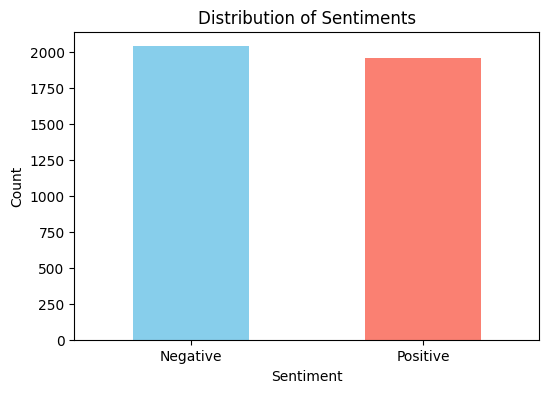

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movies_review = pd.read_csv("https://raw.githubusercontent.com/durgesh09ai/Natural-Language-Processing/main/movie_reviews.csv")
plt.figure(figsize=(6, 4))
sentiment_counts = movies_review['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Negative', 'Positive'], rotation=0)
plt.show()

# Visualize the most frequent words in the reviews


{'absolutely': 224, 'acting': 188, 'amazing': 210, 'best': 224, 'boring': 213, 'captivating': 198, 'cast': 198, 'cinematography': 210, 'couldn': 181, 'didn': 219, 'direction': 211, 'disappointing': 190, 'edge': 207, 'effects': 196, 'ending': 190, 'fantastic': 224, 'film': 387, 'great': 198, 'heartwarming': 185, 'highly': 185, 'incredible': 196, 'kept': 207, 'lacked': 202, 'laughing': 181, 'like': 219, 'mediocre': 188, 'movie': 1036, 'movies': 224, 'originality': 202, 'outstanding': 169, 'performances': 198, 'plot': 438, 'poorly': 194, 'predictable': 219, 'recommend': 185, 'ruined': 211, 'screenplay': 194, 'seat': 207, 'seen': 224, 'soundtrack': 169, 'special': 196, 'stop': 181, 'storyline': 198, 'terrible': 211, 'touching': 185, 'twist': 219, 'uninteresting': 213, 've': 224, 'watching': 187, 'worth': 187, 'written': 194}


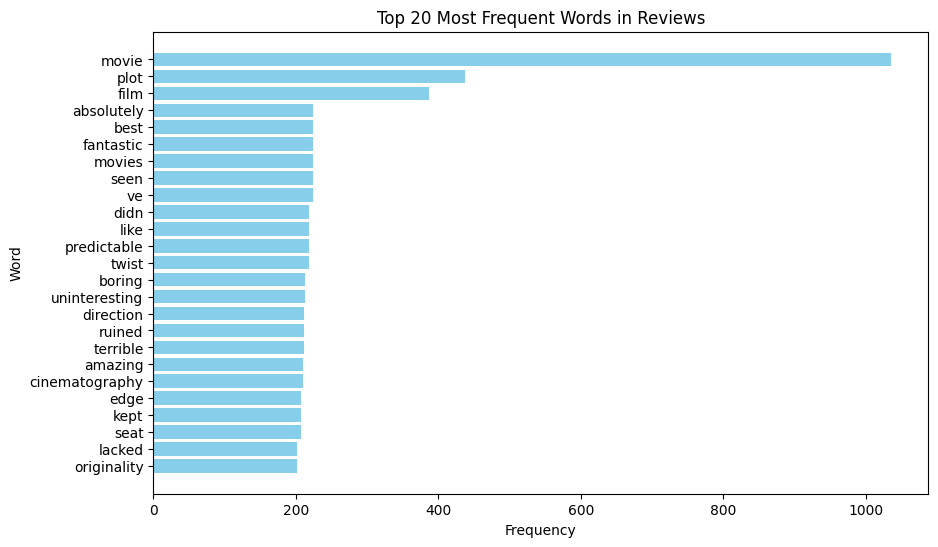

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Download NLTK resources if not already downloaded

#nltk.download('punkt')
#nltk.download('stopwords')

movies_review = pd.read_csv("https://raw.githubusercontent.com/durgesh09ai/Natural-Language-Processing/main/movie_reviews.csv")

# Visualize the most frequent words in the reviews
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = count_vectorizer.fit_transform(movies_review['Review'])
words = count_vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_frequencies))
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:25]
print(word_freq_dict)

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_word_freq], [x[1] for x in sorted_word_freq], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()


# Analyze the distribution of review lengths


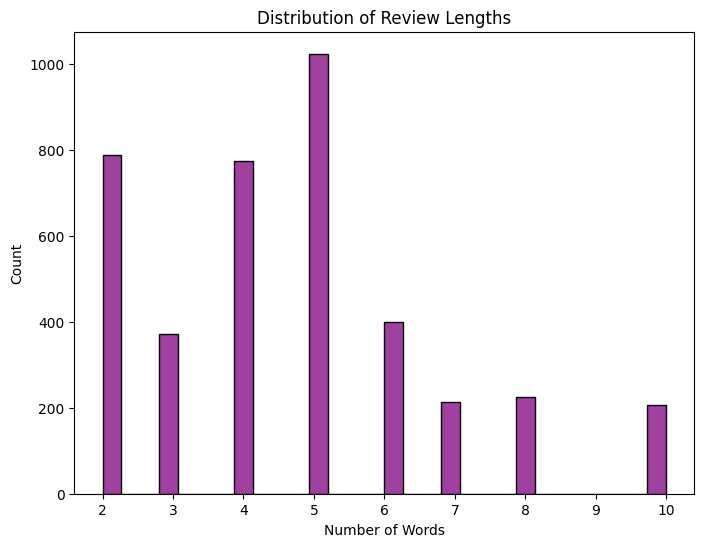

In [9]:
review_lengths = movies_review['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()